### Optimal control of the FHN model
This notebook shows how to compute the optimal control signal for the FHN model for a simple example task

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

if os.getcwd().split(os.sep)[-1] == "optimal_control":
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.fhn import FHNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_fhn

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We stimulate the system with a known control signal, define the resulting activity as target, and compute the optimal control for this target. The optimal control signal should converge to the input signal.

In [24]:
# We import the model
fhn = FHNModel()

# Some parameters to define stimulation signals
dt = fhn.params["dt"]
duration = 100.
T = int(np.around(duration/dt, 1) + 1)

# We set the duration of the simulation and the initial values
fhn.params["duration"] = duration
x_init = 0.
y_init = 0.
fhn.params["xs_init"] = np.array([[x_init]])
fhn.params["ys_init"] = np.array([[y_init]])

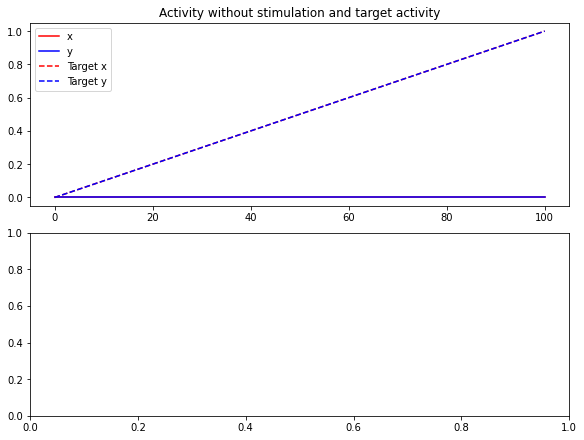

In [25]:
# Define the result of the stimulation as target
x_target = np.arange(0,1.001,0.001)
target = np.column_stack(( [x_target, x_target] )).T

# Remove stimuli and re-run the simulation
fhn.params["x_ext"] = np.zeros(( 1,T ))
fhn.params["y_ext"] = np.zeros(( 1,T ))
fhn.run()

# combine initial value and simulation result to one array
x = np.vstack( [x_init, fhn.x.T])
y = np.vstack( [y_init, fhn.y.T])

fig, ax = plt.subplots( 2,1, figsize=(8,6), constrained_layout=True)

# Plot the target (dashed line) and unperturbed activity
t_array = np.arange(0, duration+dt, dt)

ax[0].plot(t_array, x, label="x", color=color_x)
ax[0].plot(t_array, y, label="y", color=color_y)
ax[0].plot(t_array, x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].plot(t_array, x_target, linestyle='dashed', label="Target y", color=color_y)
ax[0].legend()
ax[0].set_title("Activity without stimulation and target activity")


plt.show()

In [26]:
start_time = time.time()

fhn_controlled = oc_fhn.OcFhn(fhn, target, w_p=1, w_2=0, print_array=[1,2,100,200,300,400,500])
fhn_controlled.optimize(200)
print("--- %s seconds ---" % (time.time() - start_time))


ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!


diverging model output, decrease step size to  7.0
diverging model output, decrease step size to  4.8999999999999995
diverging model output, decrease step size to  3.4299999999999993
diverging model output, decrease step size to  2.4009999999999994
diverging model output, decrease step size to  1.6806999999999994
diverging model output, decrease step size to  1.1764899999999996
diverging model output, decrease step size to  0.8235429999999997
diverging model output, decrease step size to  0.5764800999999997
diverging model output, decrease step size to  0.4035360699999998
diverging model output, decrease step size to  0.2824752489999998
diverging model output, decrease step size to  0.19773267429999986
diverging model output, decrease step size to  0.13841287200999988
diverging model output, decrease step size to  0.09688901040699992
Cost in iteration 1: 314.15013860319016
Cost in iteration 2: 292.96974694388445


ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!


diverging model output, decrease step size to  0.06782230728489994
diverging model output, decrease step size to  0.04747561509942995
diverging model output, decrease step size to  0.033232930569600964
Cost in iteration 100: 181.79697769604152
--- 2.1806578636169434 seconds ---


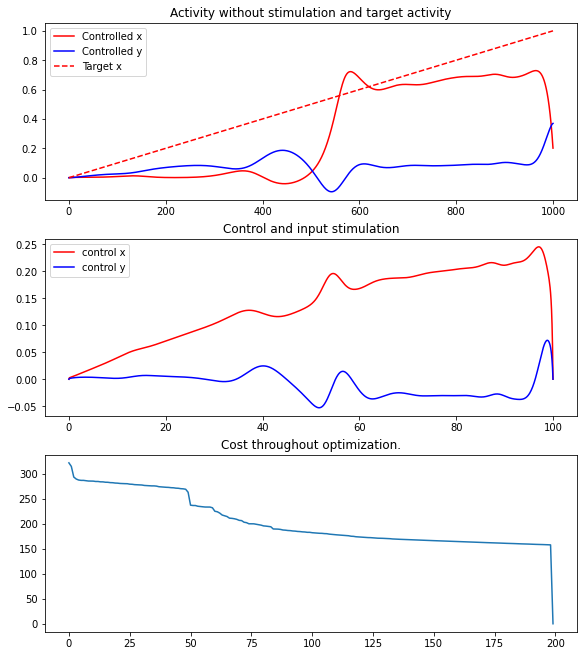

In [18]:
# combine the initial values and time series of controlled model to one array
x_oc = np.vstack( [fhn_controlled.model.params["xs_init"], fhn_controlled.model.x.T])
y_oc = np.vstack( [fhn_controlled.model.params["ys_init"], fhn_controlled.model.y.T])

control = fhn_controlled.control


fig, ax = plt.subplots( 3,1, figsize=(8,9), constrained_layout=True)

# Plot the target (dashed line) and controlled activity
ax[0].plot(x_oc, label="Controlled x", color=color_x)
ax[0].plot(y_oc, label="Controlled y", color=color_y)
ax[0].plot(x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].legend()
ax[0].set_title("Activity without stimulation and target activity")

# Plot the target control signal (dashed line) and control signal after 500 iterations
ax[1].plot(t_array, control[0,:], label="control x", color=color_x)
ax[1].plot(t_array, control[1,:], label="control y", color=color_y)
ax[1].legend()
ax[1].set_title("Control and input stimulation")

# Plot the cost as function of iteration
ax[2].plot(fhn_controlled.cost_history)
ax[2].set_title("Cost throughout optimization.")
plt.show()

In [11]:
# Do another 100 iterations if you want to
# repeated execution will continue with further 100 iterations
fhn_controlled.optimize(100)

Cost in iteration 1: 0.13247286414022946
Cost in iteration 2: 0.13044668741583196


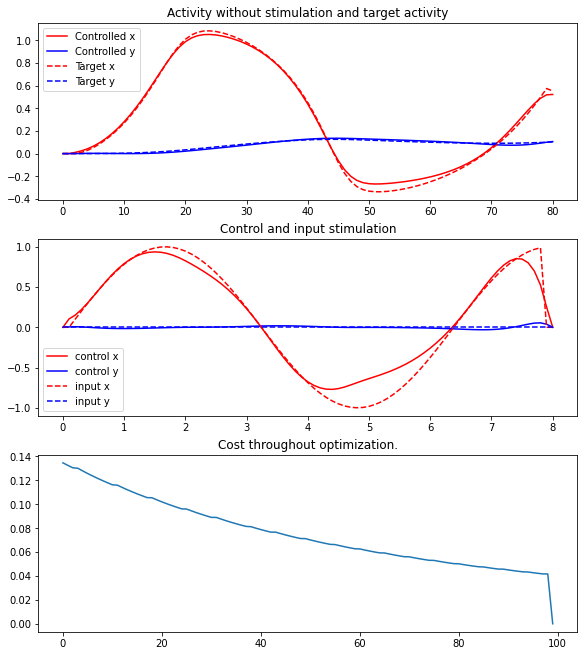

In [12]:

x_oc = np.vstack( [fhn_controlled.model.params["xs_init"], fhn_controlled.model.x.T])
y_oc = np.vstack( [fhn_controlled.model.params["ys_init"], fhn_controlled.model.y.T])

control = fhn_controlled.control

# Plot the results again
fig, ax = plt.subplots( 3,1, figsize=(8,9), constrained_layout=True)

ax[0].plot(x_oc, label="Controlled x", color=color_x)
ax[0].plot(y_oc, label="Controlled y", color=color_y)
ax[0].plot(x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].plot(y_target, linestyle='dashed', label="Target y", color=color_y)
ax[0].legend()
ax[0].set_title("Activity without stimulation and target activity")

ax[1].plot(t_array, control[0,:], label="control x", color=color_x)
ax[1].plot(t_array, control[1,:], label="control y", color=color_y)
ax[1].plot(t_array, input[0,:], linestyle='dashed', label="input x", color=color_x)
ax[1].plot(t_array, zero_input[0,:], linestyle='dashed', label="input y", color=color_y)
ax[1].legend()
ax[1].set_title("Control and input stimulation")

ax[2].plot(fhn_controlled.cost_history)
ax[2].set_title("Cost throughout optimization.")
plt.show()